### 임의 데이터 생성

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [121]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1) - 0.5

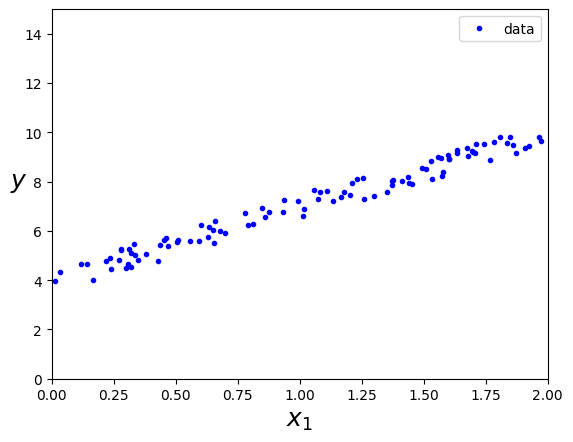

In [122]:
plt.plot(X, y, "b.", label='data')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

### 정규 방정식으로 모델의 파라미터 찾기

In [124]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [125]:
theta_best

array([[4.06033953],
       [2.9577354 ]])

In [126]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.06033953],
       [9.97581033]])

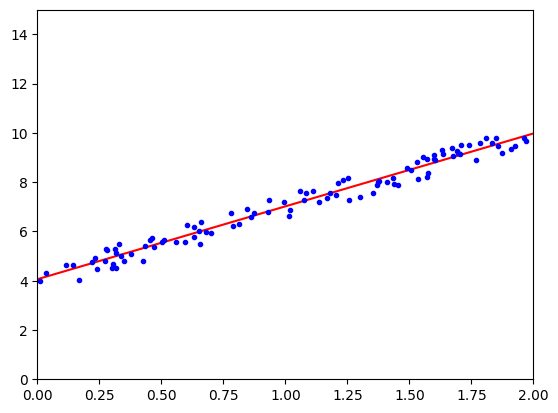

In [127]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 경사 하강법

In [128]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [129]:
theta

array([[4.06033953],
       [2.9577354 ]])

In [132]:
X_new_b.dot(theta)

array([[4.06033953],
       [9.97581033]])

In [133]:
y_predict_b = X_new_b.dot(theta)

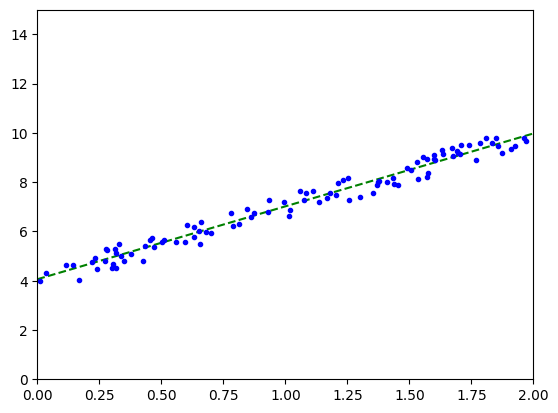

In [142]:
# plt.plot(X_new, y_predict, "r-")
plt.plot(X_new, y_predict_b, "g--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100,1) - 0.5
X_real = np.expand_dims(np.array([0, 2]), axis=1)
y_real = 4 + 3 * X_real

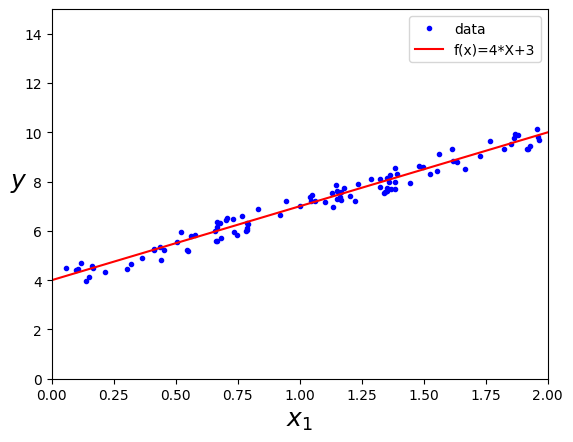

In [51]:
plt.plot(X, y, "b.", label='data')
plt.plot(X_real, y_real, "r-", label='f(x)=4*X+3')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lin_reg = LinearRegression()

In [101]:
lin_reg.fit(X, y)

LinearRegression()

In [102]:
lin_reg.intercept_, lin_reg.coef_

(array([3.95815139]), array([[2.99855154]]))

In [107]:
X_new = np.array([[0], [2]])

In [110]:
y_new = lin_reg.predict(X_new)

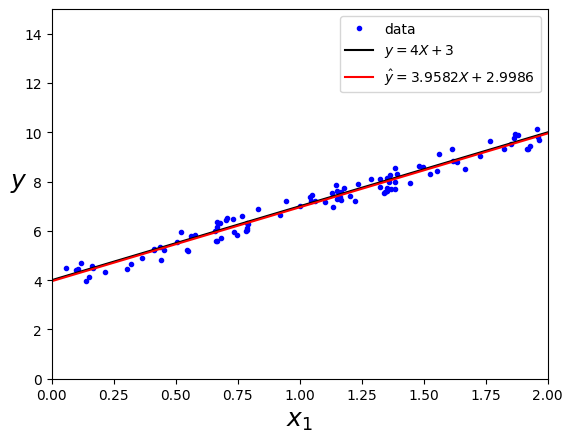

In [118]:
plt.plot(X, y, "b.", label='data')
plt.plot(X_real, y_real, "k-", label='$y=4X+3$')
plt.plot(X_new, y_new, "r-", label='$\hat y=3.9582X+2.9986$')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

### 다항 회귀를 이용한 과소적합, 과대적합 예제

In [143]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [144]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

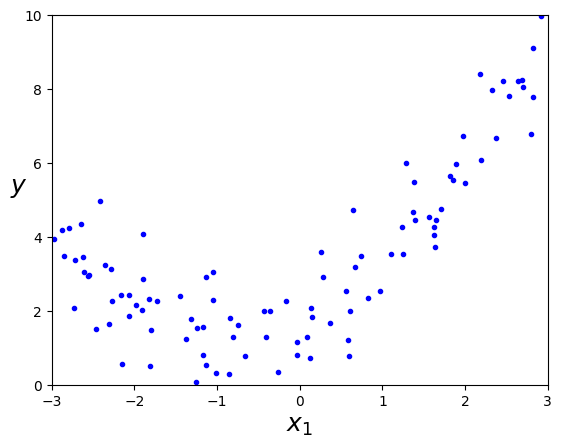

In [146]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [147]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [148]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [149]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

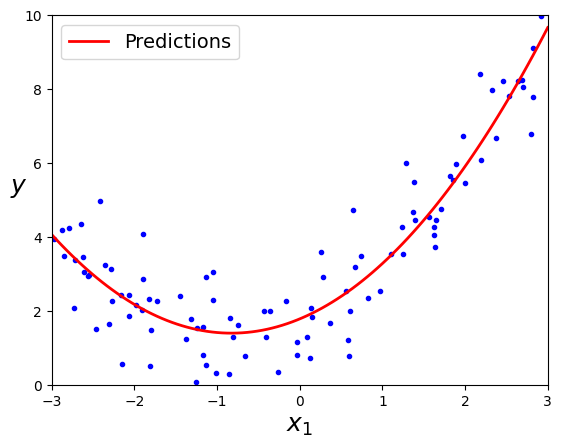

In [151]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

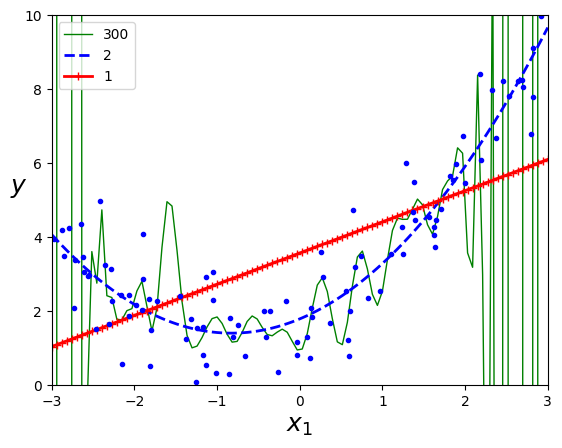

In [152]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()